In [72]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string
import pickle
from sklearn.pipeline import Pipeline

# 1. Memasukkan Data Set 

In [73]:

dataset = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')

dataset.head(10) #Printing first 10 rows of the dataset

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...


In [74]:
dataset.dtypes


Id             int64
Sentiment     object
Text Tweet    object
dtype: object

In [75]:
dataset_positive = dataset[dataset['Sentiment'] == 'positive']
print("Data dengan sentimen positif:")
print(dataset_positive.head(10))

Data dengan sentimen positif:
    Id Sentiment                                         Text Tweet
0    1  positive  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1    2  positive  Saktinya balik lagi, alhamdulillah :v <PROVIDE...
6    7  positive  <PROVIDER_NAME>  aku pakai <PROVIDER_NAME>, pa...
16  17  positive  <PROVIDER_NAME> <PROVIDER_NAME> kangen nih dap...
22  23  positive          Jadi stabil disini. <PROVIDER_NAME> <URL>
23  24  positive  #CUG <PROVIDER_NAME> #Community Sangat Cocok B...
32  33  positive  Hore,,, Akhirnya ada sinyal 4G <PROVIDER_NAME>...
33  34  positive  Alhamdulilah dikunjungi para vendor mitra <PRO...
41  42  positive  <PROVIDER_NAME> 1berbagi tanpa kuota 2 berbaga...
42  43  positive  <PROVIDER_NAME> bagi berkah 1video ngabuburit ...


In [76]:
dataset_negatif = dataset[dataset['Sentiment'] == 'negative']
print("Data dengan sentimen negatif:")
print(dataset_negatif.head(10))

Data dengan sentimen negatif:
    Id Sentiment                                         Text Tweet
2    3  negative  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...
3    4  negative  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4    5  negative            Selamat malam PENDUSTA <PROVIDER_NAME> 
5    6  negative  Untuk penembakan paket dari <PRODUCT_NAME> mas...
7    8  negative  RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8    9  negative  keluhan gak ditanggapi. bikin emosi aja. pulsa...
9   10  negative  #Bilboard iklan <PROVIDER_NAME> kok ada pesan ...
10  11  negative  <PROVIDER_NAME> mampus!!!!! bulan puasa, subuh...
11  12  negative  <USER_MENTION> Pernah coba pakai <PROVIDER_NAM...
12  13  negative  Setuju, <USER_MENTION> silahkan boikot saja pe...


# 2. Cleaning Data

=======================================================================================================================

In [77]:
dataset.columns = ['ID','Sentiment','Komentar_tweet']
dataset

,ID,Sentiment,Komentar_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [78]:
dataset.isna().sum()

ID                0
Sentiment         0
Komentar_tweet    0
dtype: int64

=======================================================================================================================

# 3. Melakukan Transformasi Data

In [79]:
# Membuat kolom baru untuk sentimen positif dan negatif
dataset['Sentiments'] = dataset['Sentiment'].apply(lambda x: 0 if x == 'positive' else 1)

# Menampilkan dataset setelah one-hot encoding
print("Dataset setelah one-hot encoding:")
dataset

Dataset setelah one-hot encoding:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",0
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,1
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,1
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,1
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",0
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,0
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...",0
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...",0


In [80]:
# Mengurutkan DataFrame asli berdasarkan kolom 'Sentiment', data positif berada paling atas
dataset.sort_values(by='Sentiment', ascending=False, inplace=True)

# Menampilkan hasil sorting
print("Dataset setelah sorting dengan sentimen positif paling atas:")
dataset

Dataset setelah sorting dengan sentimen positif paling atas:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
136,137,positive,"WOW, Saya baru mendapatkan hadiah fantastis da...",0
138,139,positive,Ajaib min <PROVIDER_NAME> kartu saya bisa diis...,0
139,140,positive,Mantap deh <PROVIDER_NAME>. Cuma isi pulsa 25r...,0
140,141,positive,terimakasih paket data sudah aktif dan normal...,0
...,...,...,...,...
51,52,negative,Aku kira diganti pulsaku. udah komplain sana s...,1
185,186,negative,Ini sinyal H+ palsu. Seperti H+ rasa edge. <PR...,1
186,187,negative,Pelanggan <PROVIDER_NAME> <PROVIDER_NAME> yg a...,1
187,188,negative,Hati-hati Tukang Tipu!! <PROVIDER_NAME>,1


=======================================================================================================================

# 4. Melakukan Pre-Processing data
# Menghilangkan Karakter yang tidak diperlukan

In [81]:
# Mengganti <PROVIDER_NAME>, <USER_MENTION>, dan <URL> dengan string kosong
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<PROVIDER_NAME>', '')
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<USER_MENTION>', '')
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<URL>', '')

# Menampilkan dataset setelah penggantian
print("Dataset setelah menghapus <PROVIDER_NAME>, <USER_MENTION>, dan <URL>:")
dataset




Dataset setelah menghapus <PROVIDER_NAME>, <USER_MENTION>, dan <URL>:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,#BOIKOT_ Gunakan Produk Bangsa Sendiri,0
136,137,positive,"WOW, Saya baru mendapatkan hadiah fantastis da...",0
138,139,positive,Ajaib min kartu saya bisa diisi pulsa & digun...,0
139,140,positive,Mantap deh . Cuma isi pulsa 25ribu dapat bonus...,0
140,141,positive,terimakasih paket data sudah aktif dan normal...,0
...,...,...,...,...
51,52,negative,Aku kira diganti pulsaku. udah komplain sana s...,1
185,186,negative,Ini sinyal H+ palsu. Seperti H+ rasa edge.,1
186,187,negative,Pelanggan yg ada di area #Pandeglangkota dir...,1
187,188,negative,Hati-hati Tukang Tipu!!,1


### menghapus karakter, mengubah menjadi huruf kecil

In [82]:
import re
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip("")
    comment = re.sub(r'[?|$|.|*&12_:")(-+,<>#!@]','', comment)
    return comment

### tokenisasi

In [83]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

In [84]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
more_stopword = ['dengan','ia', 'lemot', 'jaringan', 'pakai', '00', '007', '08', '0ribu', '30', '300', '30mb', '36604', '3kbps' ,'3minggu', '45g', '4g', '4gnya', '500', '50mbps', '60', '7eleven', '9giga', 'acara', 'aceh', 'whatsappnotsave', 'ciwidey', 'moga', 'lot', 'j5productname', 'wow', 'edge', '4glte', '000','hati-hati', 'adalah', 'productname', 'php','4g', 'amsyong', 'a', 'b', 'v', 'yg', 'd', 'di', 'deh', 'h', '4', 'gb', '5', 'keki', '5ribu', 'min', 'rp', 'cs', 'lte', '3g', 'rt', 'ht', 'pki', 'gak', 'lot', '30menit', 'ga', '6gb', 'wkp', '5', 'menit', '5gb', 'gprs', '0000', '3', 'menit', 'sih', 'adhan', '3gb', 'gajayana', 'lgsg', 'brsatu', 'lot', 'iot','pandeglangkota', 'krn', 'kam', 'bbm', 'aja' ]

stopwords_ind = more_stopword + stopwords_ind

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

stemming

In [85]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

## menggabungkan fungsi

In [86]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
#   text = tokenization(text)
  return text.lower()

## meng apply fungsi yang sudah digabungkan tadi ke dataset

In [87]:
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].apply(text_preprocessing_process)

In [88]:
X = dataset['Komentar_tweet']
y = dataset['Sentiments']
X
y

0      0
136    0
138    0
139    0
140    0
      ..
51     1
185    1
186    1
187    1
299    1
Name: Sentiments, Length: 300, dtype: int64

In [89]:
dataset

,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,boikot produk bangsa,0
136,137,positive,hadiah fantastis simpel,0
138,139,positive,ajaib kartu isi pulsa terimakasih ya,0
139,140,positive,mantap isi pulsa bonus paket data terimakasih ...,0
140,141,positive,terimakasih paket data aktif normal terimakasi...,0
...,...,...,...,...
51,52,negative,ganti pulsa udah komplain,1
185,186,negative,sinyal palsu,1
186,187,negative,langgan area rugi telpon rusak baik,1
187,188,negative,tukang tipu,1


In [90]:
dataset.head(10)

,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,boikot produk bangsa,0
136,137,positive,hadiah fantastis simpel,0
138,139,positive,ajaib kartu isi pulsa terimakasih ya,0
139,140,positive,mantap isi pulsa bonus paket data terimakasih ...,0
140,141,positive,terimakasih paket data aktif normal terimakasi...,0
141,142,positive,usaha lupa konsumen hapus pesan baca salah thanks,0
142,143,positive,terima kasih,0
143,144,positive,hore sinyalthanks,0
144,145,positive,alhamdulillah nunggu subuh lantun styles mekah...,0
145,146,positive,lihat youtube tahun kuota keren,0


# meng ekspor data clean

In [91]:
dataset.to_csv('clean_data.csv')

In [92]:
from wordcloud import WordCloud

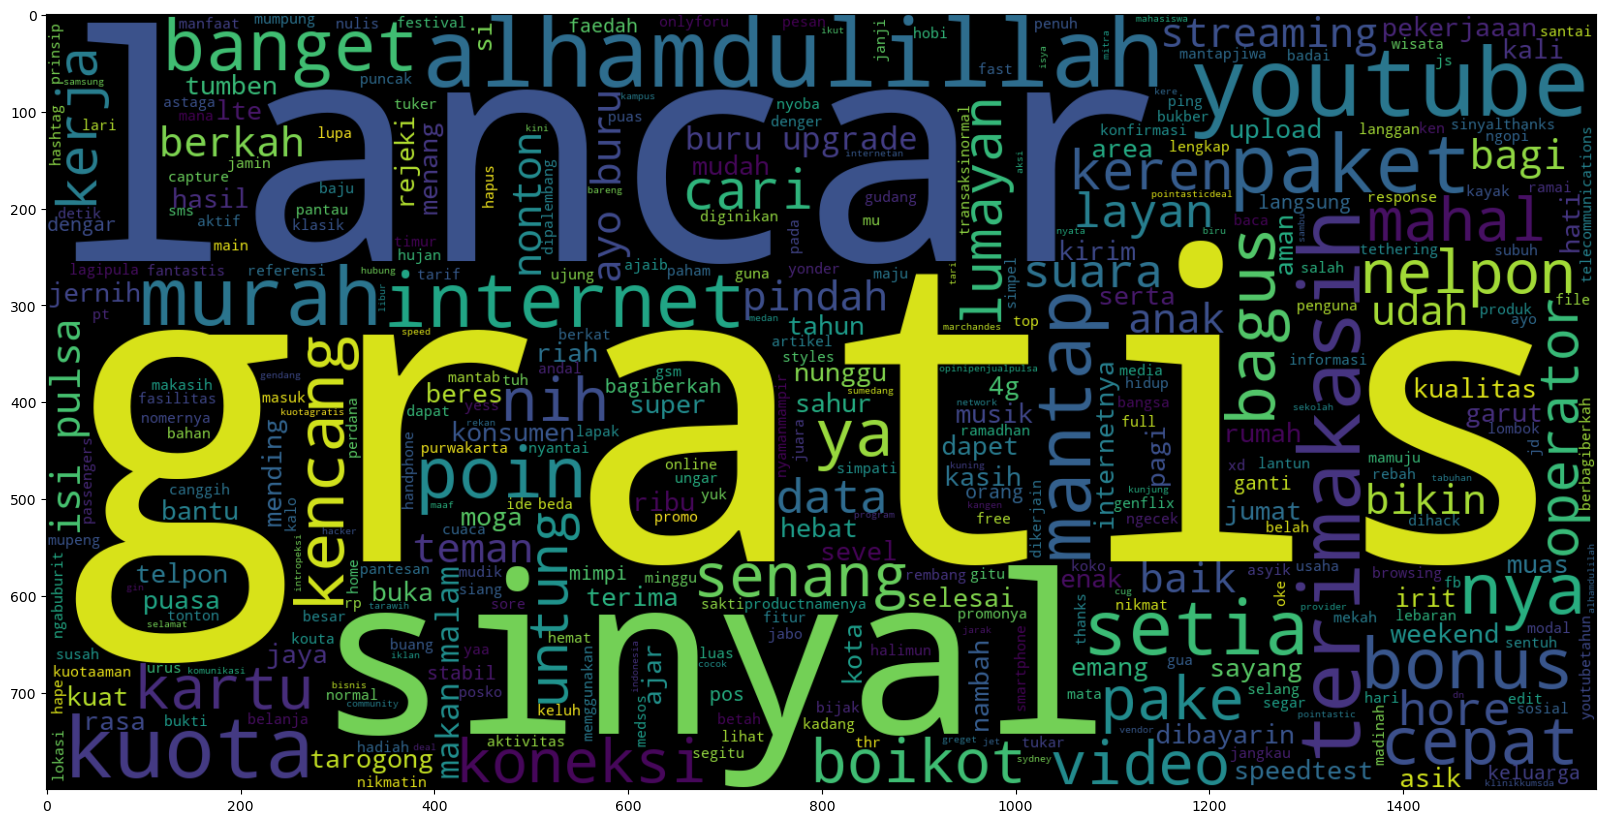

In [93]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.Sentiment == 'positive'].Komentar_tweet))
plt.imshow(wc , interpolation = 'bilinear')

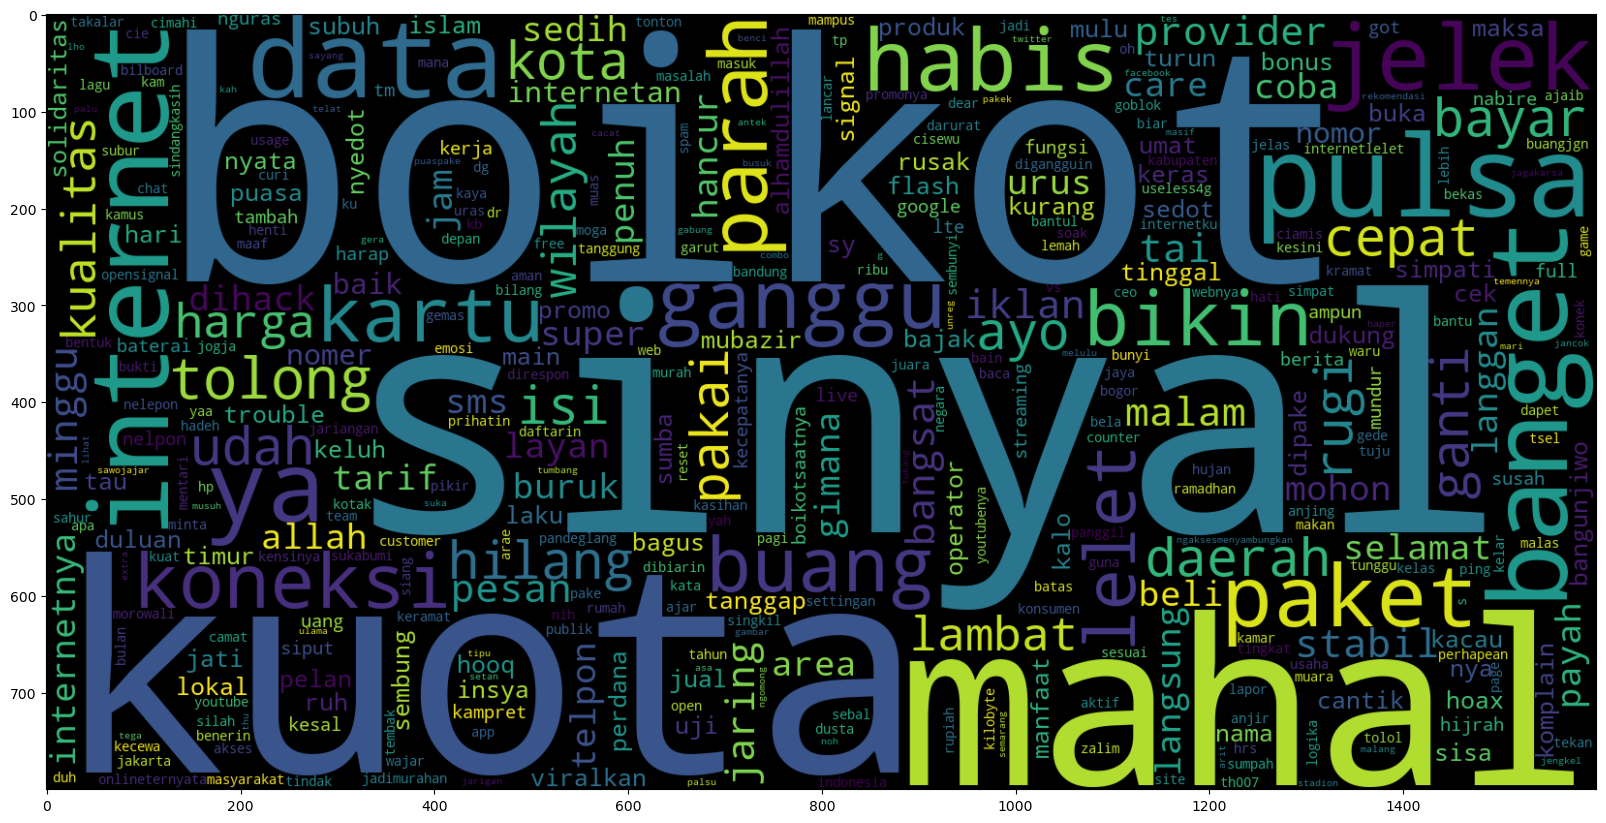

In [94]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.Sentiment == 'negative'].Komentar_tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [95]:
dataset = dataset.astype({'Sentiment' : 'category'})
dataset = dataset.astype({'Komentar_tweet' : 'string'})
dataset.dtypes

ID                         int64
Sentiment               category
Komentar_tweet    string[python]
Sentiments                 int64
dtype: object

## TF-IDF PROCESSING

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(dataset['Komentar_tweet'].astype('U'))
print(X_cVec)

h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)

  (0, 78)	1
  (0, 480)	1
  (0, 44)	1
  (1, 188)	1
  (1, 151)	1
  (1, 546)	1
  (2, 3)	1
  (2, 270)	1
  (2, 228)	1
  (2, 490)	1
  (2, 601)	1
  (2, 661)	1
  (3, 228)	1
  (3, 490)	1
  (3, 601)	1
  (3, 364)	1
  (3, 80)	1
  (3, 452)	1
  (3, 121)	1
  (3, 329)	1
  (3, 365)	1
  (4, 601)	2
  (4, 452)	1
  (4, 121)	1
  (4, 329)	1
  :	:
  (289, 25)	1
  (290, 549)	1
  (291, 221)	1
  (291, 302)	1
  (291, 250)	1
  (293, 78)	1
  (293, 402)	1
  (293, 636)	1
  (294, 549)	1
  (295, 490)	1
  (295, 633)	1
  (295, 166)	1
  (295, 299)	1
  (296, 549)	1
  (296, 453)	1
  (297, 24)	1
  (297, 596)	1
  (297, 323)	1
  (297, 38)	1
  (297, 507)	1
  (297, 511)	1
  (298, 624)	1
  (298, 612)	1
  (299, 549)	1
  (299, 564)	1
  (0, 480)	0.6077594883278279
  (0, 78)	0.3984365587434562
  (0, 44)	0.6869328300526693
  (1, 546)	0.5773502691896257
  (1, 188)	0.5773502691896257
  (1, 151)	0.5773502691896257
  (2, 661)	0.3536062576902362
  (2, 601)	0.40204158622996927
  (2, 490)	0.3650310507311415
  (2, 270)	0.3853994182234336
  (2

In [97]:
tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [98]:
print(len(tf_idf.get_feature_names_out()))

671


In [99]:
print(tf_idf.get_feature_names_out())

['00' '4g' '500' 'ajaib' 'ajar' 'akses' 'aksi' 'aktif' 'aktivitas'
 'alhamdulilah' 'alhamdulillah' 'allah' 'aman' 'ampun' 'an' 'anak' 'and'
 'andal' 'anjing' 'anjir' 'antek' 'apa' 'app' 'arae' 'area' 'arit'
 'artikel' 'asa' 'asik' 'astaga' 'asyik' 'ayo' 'baca' 'badai' 'bagi'
 'bagiberkah' 'bagus' 'bahan' 'baik' 'bain' 'bajak' 'baju' 'bandung'
 'banget' 'bangsa' 'bangsat' 'bangunjiwo' 'bantu' 'bantul' 'baper'
 'bareng' 'batas' 'baterai' 'bayar' 'beda' 'bekas' 'bela' 'belah'
 'belanja' 'beli' 'benci' 'benerin' 'bentuk' 'berbagiberkah' 'beres'
 'berita' 'berkah' 'berkat' 'besar' 'betah' 'biar' 'bijak' 'bikin'
 'bilang' 'bilboard' 'biru' 'bisnis' 'bogor' 'boikot' 'boikotsaatnya'
 'bonus' 'browsing' 'buang' 'buangjgn' 'buka' 'bukber' 'bukti' 'bulan'
 'bunyi' 'buru' 'buruk' 'busuk' 'cacat' 'camat' 'canggih' 'cantik'
 'capture' 'care' 'cari' 'cek' 'ceo' 'cepat' 'chat' 'ciamis' 'cie'
 'cimahi' 'cisewu' 'coba' 'cocok' 'combo' 'community' 'counter' 'cuaca'
 'cug' 'curi' 'customer' 'daerah' 'daft

In [100]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,00,4g,500,ajaib,ajar,akses,aksi,aktif,aktivitas,alhamdulilah,...,ya,yaa,yah,yess,yonder,youtube,youtubenya,youtubetahun,yuk,zalim
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.511939,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.353606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.365249,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X = np.array(data_tf_idf)
y = np.array(y)

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=500)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 671
Reduced feature number: 500


In [104]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.265339
1,0.857724
2,0.265339
3,0.052069
4,0.036862
...,...
666,3.611343
667,0.314392
668,0.521927
669,0.992651


In [105]:
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.265339,00
1,0.857724,4g
2,0.265339,500
3,0.052069,ajaib
4,0.036862,ajar
...,...,...
666,3.611343,youtube
667,0.314392,youtubenya
668,0.521927,youtubetahun
669,0.992651,yuk


In [106]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
179,7.215594,gratis
322,7.179673,lancar
601,5.857439,terimakasih
364,4.706525,mantap
249,4.293084,jelek
...,...,...
304,0.001860,konsumen
196,0.000691,hari
159,0.000074,free
84,0.000038,buka


In [107]:
mask = chi2_features.get_support()
mask

array([False,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,

In [108]:
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['4g',
 'akses',
 'aksi',
 'aktivitas',
 'alhamdulilah',
 'alhamdulillah',
 'allah',
 'ampun',
 'an',
 'anak',
 'and',
 'andal',
 'anjing',
 'anjir',
 'apa',
 'app',
 'artikel',
 'asa',
 'asik',
 'astaga',
 'asyik',
 'badai',
 'bagi',
 'bagiberkah',
 'bagus',
 'bahan',
 'baik',
 'bajak',
 'bandung',
 'bangsa',
 'bangsat',
 'bangunjiwo',
 'bantul',
 'baper',
 'bareng',
 'bayar',
 'beda',
 'bekas',
 'belah',
 'belanja',
 'beli',
 'benerin',
 'berbagiberkah',
 'beres',
 'berkah',
 'berkat',
 'besar',
 'betah',
 'biar',
 'bijak',
 'bilang',
 'bilboard',
 'biru',
 'bogor',
 'boikot',
 'boikotsaatnya',
 'bonus',
 'browsing',
 'buang',
 'bukber',
 'bunyi',
 'buru',
 'buruk',
 'busuk',
 'cacat',
 'camat',
 'canggih',
 'cantik',
 'capture',
 'care',
 'cari',
 'cek',
 'chat',
 'ciamis',
 'cimahi',
 'cisewu',
 'coba',
 'combo',
 'cuaca',
 'customer',
 'daerah',
 'dapat',
 'darurat',
 'data',
 'deal',
 'dear',
 'dengar',
 'denger',
 'detik',
 'dibayarin',
 'dibiarin',
 'digangguin',
 'diginikan',


In [109]:

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [110]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,4g,akses,aksi,aktivitas,alhamdulilah,alhamdulillah,allah,ampun,an,anak,...,wilayah,wisata,xd,yah,yess,yonder,youtube,youtubetahun,yuk,zalim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

## 8. Process modeling Data

In [112]:
X = x_tfidf
Y = dataset['Sentiments']

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from joblib import dump 

x_train, X_test, y_train, Y_test = train_test_split(X_kbest_features, Y, test_size = 0.4, random_state = 42)

In [114]:
# Training the model
algorithm = GaussianNB()               # Load algoritma pembelajaran
model = algorithm.fit(x_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [115]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [116]:
# Tampilkan label sebenarnya pada data uji (actual label)
Y_test

216    1
47     1
253    1
145    0
61     1
      ..
46     0
247    1
54     1
258    1
276    1
Name: Sentiments, Length: 120, dtype: int64

# 9. MODEL EVAL

Accuracy   :  0.8166666666666667
Precission :  0.75
Recall     :  0.967741935483871
F1 score   :  0.8450704225352113
confusion matrix : 
 [[38 20]
 [ 2 60]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        58
           1       0.75      0.97      0.85        62

    accuracy                           0.82       120
   macro avg       0.85      0.81      0.81       120
weighted avg       0.85      0.82      0.81       120



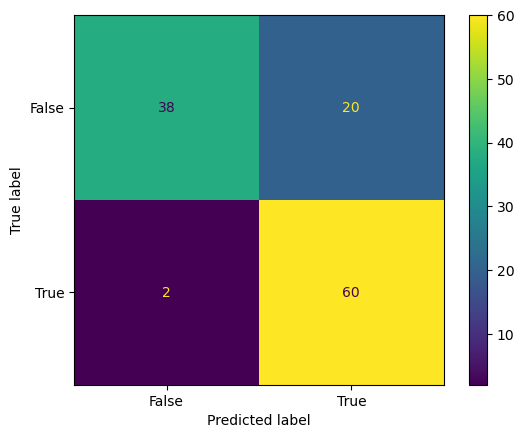

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

model = MultinomialNB()
model.fit(x_train, y_train)

predicted = model.predict(X_test)

print("Accuracy   : ", accuracy_score(Y_test, predicted))
print("Precission : ", precision_score(Y_test, predicted, average="binary", pos_label = 1))
print("Recall     : ", recall_score(Y_test, predicted, average="binary", pos_label = 1))
print("F1 score   : ", f1_score(Y_test, predicted, average="binary", pos_label = 1))

cm = confusion_matrix(Y_test, predicted)
print(f'confusion matrix : \n {cm}')
print(classification_report(Y_test, predicted, zero_division =  0))

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_disp.plot()
plt.show()


In [118]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [122]:
input_text = "Hujan terus-menerus membuat sinyal jadi jelek"

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

tf_idf_vec = tf_idf_vec.fit_transform([pre_input_text]).toarray()

# Transform the pre-processed text into a dense numpy array
#tf_idf_array = tf_idf_vec.transform([pre_input_text]).toarray()

# Make the prediction using the dense array
result = model.predict(tf_idf_vec)

#result = model.predict(tf_idf_vec)  # Lakukan prediksi

print ("=== Kalimat yang akan diprediksi ===\n", input_text, "\n")
print('=== Hasil Text Preprocessing ===\n', pre_input_text, "\n")

if (result==0):
  sentimen = 'Sentimen Positif'
else:
  sentimen = 'Sentimen negatif'

print('=== Hasil prediksi kalimat ===\n', sentimen)

=== Kalimat yang akan diprediksi ===
 Hujan terus-menerus membuat sinyal jadi jelek 

=== Hasil Text Preprocessing ===
 hujan terus sinyal jelek 

=== Hasil prediksi kalimat ===
 Sentimen negatif
